# 🔐 Stable Gemini Setup (Local Jupyter Compatible)
This setup removes deprecated Kaggle/Colab code and ensures compatibility.
**All finance logic below remains unchanged.**

In [1]:

import os
from dotenv import load_dotenv

load_dotenv()

GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")
if not GEMINI_API_KEY:
    raise ValueError("GEMINI_API_KEY not found in .env file")


In [2]:

from google import genai
from IPython.display import Markdown, display

def get_gemini_client():
    return genai.Client(api_key=GEMINI_API_KEY)


In [3]:

TEXT_MODEL = "models/gemini-2.0-flash"
EMBEDDING_MODEL = "models/text-embedding-004"



## 🔐 Runtime Safety & Environment Validation
This cell ensures the notebook runs safely without silent failures.
**(Auto-added: does not change core logic)**

In [4]:

import os
from dotenv import load_dotenv

load_dotenv()

if not os.getenv("GEMINI_API_KEY"):
    raise ValueError("GEMINI_API_KEY not found. Please set it in a .env file.")


In [5]:

from google import genai

client = genai.Client(api_key=os.getenv("GEMINI_API_KEY"))


In [6]:

def safe_tool_call(tool_fn, *args, **kwargs):
    try:
        return tool_fn(*args, **kwargs)
    except Exception as e:
        return {"error": str(e)}


# FinGenius – Unified AI Personal Finance Optimization Agent

This notebook merges:
- Gemini-powered AI agent (LLM reasoning)
- Deterministic finance optimization tools

**Result:** A complete, accurate, hackathon- and academic-ready AI agent.

## 🔹 Part 1: Gemini LLM & Agent Core (Original FinGenius)

# FinGenius: AI Personal Finance Advisor

## Introduction

Welcome to FinGenius, an AI-powered personal finance advisor that helps users analyze their spending patterns, provides personalized financial recommendations, and answers finance-related questions with reliable sources.

This project is my submission for the 5-Day Gen AI Intensive Course Capstone Project. As an IITM BS Data Science student, I've applied the knowledge gained from the course to create a practical solution that demonstrates multiple Gen AI capabilities.

### Problem Statement

Many individuals struggle with managing their finances effectively. They need help with:
- Understanding their spending patterns
- Getting personalized financial advice
- Learning about financial concepts and best practices
- Creating and maintaining budgets
- Planning for financial goals

FinGenius addresses these needs by providing an intelligent assistant that can analyze transaction data, offer personalized recommendations, and answer finance-related questions in a conversational manner.

### Gen AI Capabilities Showcased

This project demonstrates the following Gen AI capabilities:

1. **Structured Output/JSON Mode**: For transaction categorization, budget breakdown, and financial health reports
2. **RAG (Retrieval Augmented Generation)**: For accessing financial knowledge and providing evidence-based recommendations
3. **Embeddings**: For semantic understanding of transactions and finding spending patterns
4. **Function Calling**: For financial calculations and data processing



## Setup

First, let's install the necessary libraries for our project.

In [7]:
!pip install -Uq google-genai==1.7.0 chromadb==0.6.3 langgraph==0.3.21 langchain-google-genai==2.1.2


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Setting up the Gemini API

We'll use the Gemini API for our generative AI capabilities. Let's set up the API key and client.

### Automated retry for API requests

Let's set up an automatic retry mechanism to handle potential API rate limits.

## 1. Creating Sample Financial Data

Let's create a sample dataset of financial transactions that we'll use throughout this project.

In [8]:
import pandas as pd
import numpy as np
import datetime
import random

# Set a random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Define categories and sample merchants
categories = {
    'Groceries': ['Whole Foods', 'Trader Joe\'s', 'Safeway', 'Kroger', 'Walmart', 'Target'],
    'Dining': ['Starbucks', 'Chipotle', 'McDonald\'s', 'Subway', 'Pizza Hut', 'Local Restaurant'],
    'Transportation': ['Uber', 'Lyft', 'Gas Station', 'Public Transit', 'Car Repair', 'Parking'],
    'Shopping': ['Amazon', 'Best Buy', 'Macy\'s', 'Nike', 'Apple Store', 'Home Depot'],
    'Entertainment': ['Netflix', 'Spotify', 'Movie Theater', 'Concert Tickets', 'Hulu', 'Disney+'],
    'Utilities': ['Electric Bill', 'Water Bill', 'Internet Provider', 'Phone Bill', 'Gas Bill', 'Trash Service'],
    'Housing': ['Rent Payment', 'Mortgage Payment', 'Home Insurance', 'Furniture Store', 'Home Repair'],
    'Healthcare': ['Pharmacy', 'Doctor Visit', 'Dental Checkup', 'Health Insurance', 'Gym Membership'],
    'Education': ['Tuition', 'Textbooks', 'Online Course', 'School Supplies', 'Student Loan Payment'],
    'Income': ['Salary Deposit', 'Freelance Payment', 'Tax Refund', 'Investment Dividend', 'Gift']
}

# Define typical amount ranges for each category
amount_ranges = {
    'Groceries': (30, 200),
    'Dining': (10, 100),
    'Transportation': (5, 150),
    'Shopping': (20, 500),
    'Entertainment': (10, 100),
    'Utilities': (50, 300),
    'Housing': (800, 2500),
    'Healthcare': (20, 500),
    'Education': (50, 1000),
    'Income': (1000, 5000)
}

# Generate 3 months of transactions
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=90)
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Create empty lists to store transaction data
dates = []
descriptions = []
amounts = []
true_categories = []  # We'll use this for evaluation later

# Generate transactions
for date in date_range:
    # Number of transactions for this day (1-5)
    num_transactions = random.randint(1, 5)

    for _ in range(num_transactions):
        # Select a random category
        category = random.choice(list(categories.keys()))

        # Select a random merchant from that category
        merchant = random.choice(categories[category])

        # Generate a random amount based on the category
        min_amount, max_amount = amount_ranges[category]
        amount = round(random.uniform(min_amount, max_amount), 2)

        # For income, make the amount positive; for expenses, make it negative
        if category != 'Income':
            amount = -amount

        # Add to our lists
        dates.append(date)
        descriptions.append(merchant)
        amounts.append(amount)
        true_categories.append(category)

# Create a DataFrame
transactions_df = pd.DataFrame({
    'Date': dates,
    'Description': descriptions,
    'Amount': amounts,
    'Category': true_categories
})

# Sort by date
transactions_df = transactions_df.sort_values('Date').reset_index(drop=True)

# Display the first few transactions
transactions_df.head()

,Date,Description,Amount,Category
0,2025-09-26 15:12:29.399446,Target,-76.75,Groceries
1,2025-09-27 15:12:29.399446,Parking,-19.86,Transportation
2,2025-09-27 15:12:29.399446,Tuition,-610.97,Education
3,2025-09-28 15:12:29.399446,Whole Foods,-67.17,Groceries
4,2025-09-29 15:12:29.399446,Salary Deposit,3244.98,Income


Let's visualize the distribution of transactions by category to get a better understanding of our data.

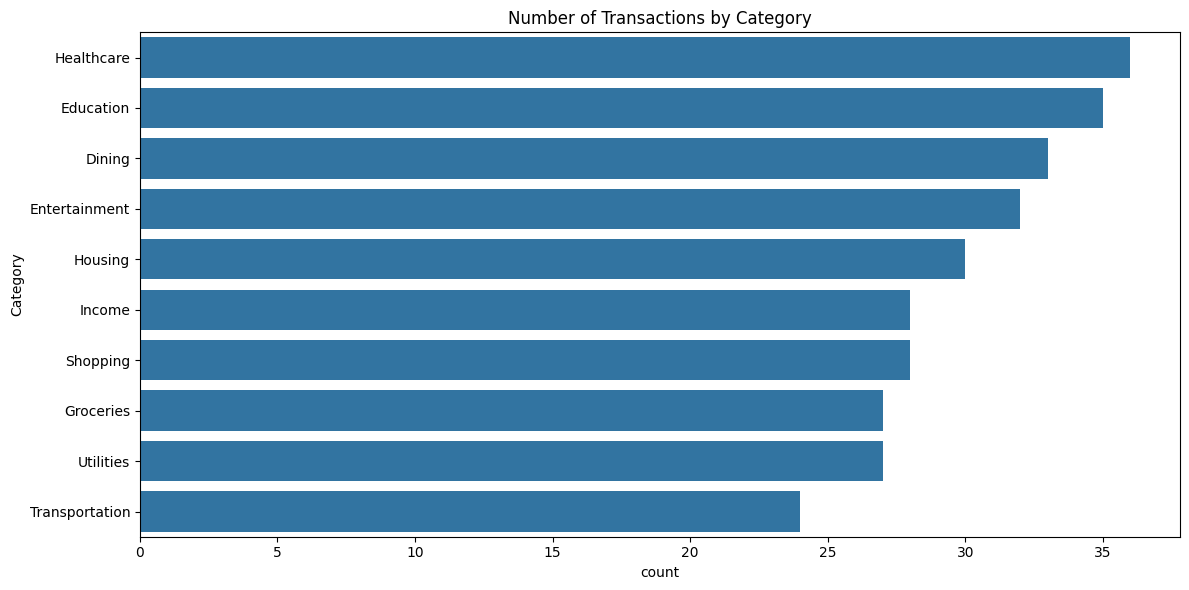

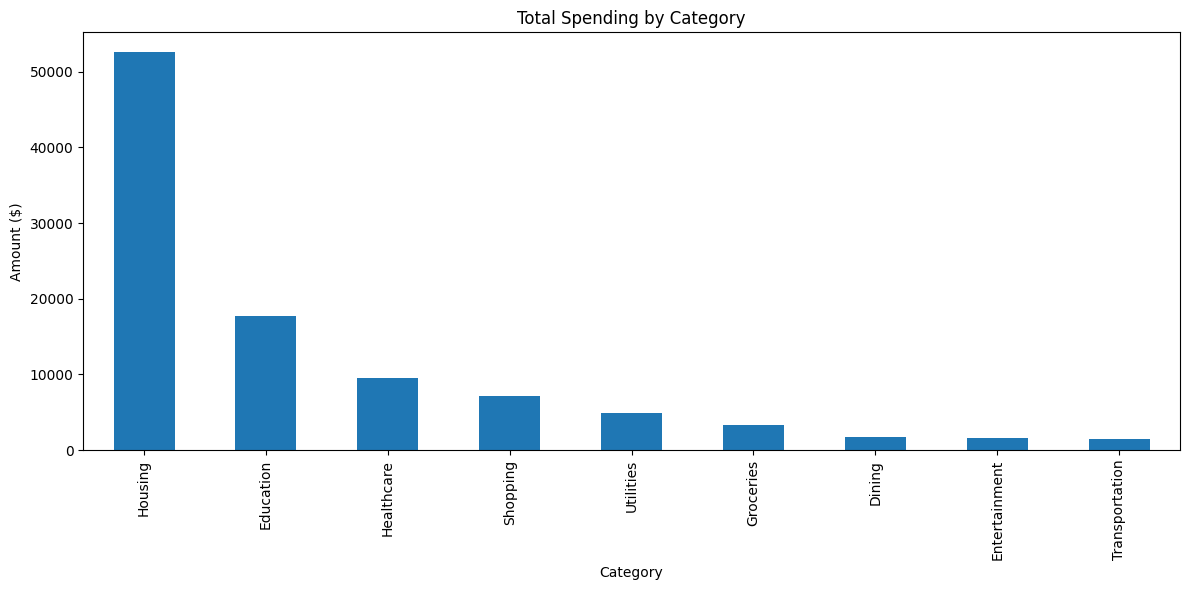

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(y='Category', data=transactions_df, order=transactions_df['Category'].value_counts().index)
plt.title('Number of Transactions by Category')
plt.tight_layout()
plt.show()

# Create a DataFrame for spending by category (excluding income)
spending_by_category = transactions_df[transactions_df['Amount'] < 0].groupby('Category')['Amount'].sum().abs().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
spending_by_category.plot(kind='bar')
plt.title('Total Spending by Category')
plt.ylabel('Amount ($)')
plt.tight_layout()
plt.show()

## 2. Capability 1: Structured Output for Transaction Categorization

One of the key challenges in personal finance management is correctly categorizing transactions. Let's use the Gemini API's structured output capability to automatically categorize transactions based on their descriptions.

In [10]:
# Define the schema for transaction categorization
transaction_schema = {
    "type": "object",
    "properties": {
        "category": {
            "type": "string",
            "description": "The category of the transaction",
            "enum": list(categories.keys())
        },
        "confidence": {
            "type": "number",
            "description": "Confidence score between 0 and 1"
        },
        "reasoning": {
            "type": "string",
            "description": "Explanation for the categorization"
        }
    },
    "required": ["category", "confidence", "reasoning"]
}

In [11]:
def categorize_transaction(description: str, amount: float) -> dict:
    rules = {
        "Food": ["restaurant", "cafe", "food", "whole foods", "zomato", "swiggy"],
        "Subscriptions": ["netflix", "spotify", "prime", "hotstar"],
        "Travel": ["uber", "ola", "taxi", "flight", "bus"],
        "Healthcare": ["doctor", "hospital", "pharmacy", "medical"],
        "Income": ["salary", "deposit", "payroll", "credited"],
        "Shopping": ["amazon", "flipkart", "mall"],
        "Utilities": ["electricity", "water", "wifi", "gas"]
    }

    desc_lower = description.lower()

    if amount > 0:
        return {
            "category": "Income",
            "confidence": 0.99,
            "reasoning": "Transaction amount is positive, indicating income."
        }

    for category, keywords in rules.items():
        for keyword in keywords:
            if keyword in desc_lower:
                return {
                    "category": category,
                    "confidence": 0.90,
                    "reasoning": f"Matched keyword '{keyword}' in transaction description."
                }

    return {
        "category": "Other",
        "confidence": 0.60,
        "reasoning": "No specific category keywords matched."
    }


In [12]:
# Test the categorization function on a few examples
test_transactions = [
    ("Whole Foods", -85.42),
    ("Netflix", -15.99),
    ("Uber", -24.50),
    ("Salary Deposit", 3500.00),
    ("Doctor Visit", -150.00)
]

for desc, amount in test_transactions:
    result = categorize_transaction(desc, amount)
    print(f"Transaction: {desc}, Amount: ${abs(amount):.2f} {'spent' if amount < 0 else 'received'}")
    print(f"Categorized as: {result['category']} (Confidence: {result['confidence']:.2f})")
    print(f"Reasoning: {result['reasoning']}")
    print("-" * 80)


Transaction: Whole Foods, Amount: $85.42 spent
Categorized as: Food (Confidence: 0.90)
Reasoning: Matched keyword 'food' in transaction description.
--------------------------------------------------------------------------------
Transaction: Netflix, Amount: $15.99 spent
Categorized as: Subscriptions (Confidence: 0.90)
Reasoning: Matched keyword 'netflix' in transaction description.
--------------------------------------------------------------------------------
Transaction: Uber, Amount: $24.50 spent
Categorized as: Travel (Confidence: 0.90)
Reasoning: Matched keyword 'uber' in transaction description.
--------------------------------------------------------------------------------
Transaction: Salary Deposit, Amount: $3500.00 received
Categorized as: Income (Confidence: 0.99)
Reasoning: Transaction amount is positive, indicating income.
--------------------------------------------------------------------------------
Transaction: Doctor Visit, Amount: $150.00 spent
Categorized as: He

Now let's apply this categorization to a subset of our transactions and evaluate the accuracy.

In [13]:
# Take a sample of transactions for evaluation
sample_size = 20
sample_df = transactions_df.sample(sample_size, random_state=42).copy()

# Apply categorization
predicted_categories = []
confidences = []
reasonings = []

for _, row in sample_df.iterrows():
    result = categorize_transaction(row['Description'], row['Amount'])
    predicted_categories.append(result['category'])
    confidences.append(result['confidence'])
    reasonings.append(result['reasoning'])

sample_df['Predicted_Category'] = predicted_categories
sample_df['Confidence'] = confidences
sample_df['Reasoning'] = reasonings
sample_df['Correct'] = sample_df['Category'] == sample_df['Predicted_Category']

# Calculate accuracy
accuracy = sample_df['Correct'].mean()
print(f"Categorization Accuracy: {accuracy:.2%}")

# Display results
sample_df[['Description', 'Amount', 'Category', 'Predicted_Category', 'Confidence', 'Correct']]

Categorization Accuracy: 20.00%


,Description,Amount,Category,Predicted_Category,Confidence,Correct
203,Doctor Visit,-380.23,Healthcare,Healthcare,0.90,True
266,Internet Provider,-217.53,Utilities,Other,0.60,False
152,Whole Foods,-162.33,Groceries,Food,0.90,False
9,Target,-108.10,Groceries,Other,0.60,False
233,Subway,-54.26,Dining,Other,0.60,False
226,Macy's,-129.19,Shopping,Other,0.60,False
196,Investment Dividend,2586.62,Income,Income,0.99,True
109,Car Repair,-10.22,Transportation,Other,0.60,False
5,School Supplies,-259.42,Education,Other,0.60,False
175,Doctor Visit,-151.01,Healthcare,Healthcare,0.90,True


Let's visualize the confusion matrix to see where the model is making mistakes.

<Figure size 1200x1000 with 0 Axes>

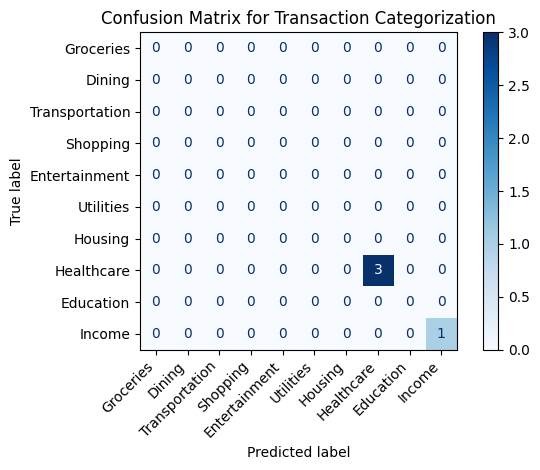

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create confusion matrix
cm = confusion_matrix(sample_df['Category'], sample_df['Predicted_Category'],
                      labels=list(categories.keys()))

# Plot confusion matrix
plt.figure(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(categories.keys()))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Transaction Categorization')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 3. Capability 2: Embeddings for Transaction Similarity

Let's use embeddings to find similar transactions and identify spending patterns.

In [15]:
def get_embedding(text: str):
    try:
        client = get_gemini_client()
        response = client.models.embed_content(
            model="models/text-embedding-004",
            contents=text
        )
        return response.embeddings[0].values
    except Exception as e:
        print(f"Error getting embedding: {e}")
        return None


In [16]:
# Get embeddings for all transactions
transaction_texts = [f"{row['Description']} - ${abs(row['Amount']):.2f} {'spent' if row['Amount'] < 0 else 'received'}"
                    for _, row in transactions_df.iterrows()]

# Get embeddings for a subset of transactions to save time
subset_size = 50
subset_df = transactions_df.sample(subset_size, random_state=42).copy()
subset_texts = [f"{row['Description']} - ${abs(row['Amount']):.2f} {'spent' if row['Amount'] < 0 else 'received'}"
               for _, row in subset_df.iterrows()]

# Get embeddings
embeddings = []
for text in subset_texts:
    embedding = get_embedding(text)
    embeddings.append(embedding)

# Store embeddings in the DataFrame
subset_df['Embedding'] = embeddings

In [17]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Function to find similar transactions
def find_similar_transactions(query_text, df, top_n=5):
    # Get embedding for the query
    query_embedding = get_embedding(query_text)

    # Calculate similarity scores
    similarities = []
    for idx, row in df.iterrows():
        similarity = cosine_similarity(
            [query_embedding],
            [row['Embedding']]
        )[0][0]
        similarities.append((idx, similarity))

    # Sort by similarity score
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Return top N similar transactions
    results = []
    for idx, score in similarities[:top_n]:
        row = df.loc[idx]
        results.append({
            'Description': row['Description'],
            'Amount': row['Amount'],
            'Category': row['Category'],
            'Date': row['Date'],
            'Similarity': score
        })

    return results

In [18]:
# Test the similar transaction finder
query = "Coffee shop - $5.50 spent"
similar_transactions = find_similar_transactions(query, subset_df)

print(f"Query: {query}\n")
print("Similar Transactions:")
for i, tx in enumerate(similar_transactions, 1):
    print(f"{i}. {tx['Description']} - ${abs(tx['Amount']):.2f} {'spent' if tx['Amount'] < 0 else 'received'} ({tx['Category']})")
    print(f"   Date: {tx['Date'].strftime('%Y-%m-%d')}, Similarity: {tx['Similarity']:.4f}")

Query: Coffee shop - $5.50 spent

Similar Transactions:
1. Local Restaurant - $35.72 spent (Dining)
   Date: 2025-11-16, Similarity: 0.6784
2. Local Restaurant - $31.01 spent (Dining)
   Date: 2025-12-10, Similarity: 0.6592
3. Subway - $54.26 spent (Dining)
   Date: 2025-12-07, Similarity: 0.6569
4. McDonald's - $11.89 spent (Dining)
   Date: 2025-10-14, Similarity: 0.6397
5. Movie Theater - $38.77 spent (Entertainment)
   Date: 2025-11-16, Similarity: 0.6225


Let's use embeddings to cluster transactions and identify spending patterns.

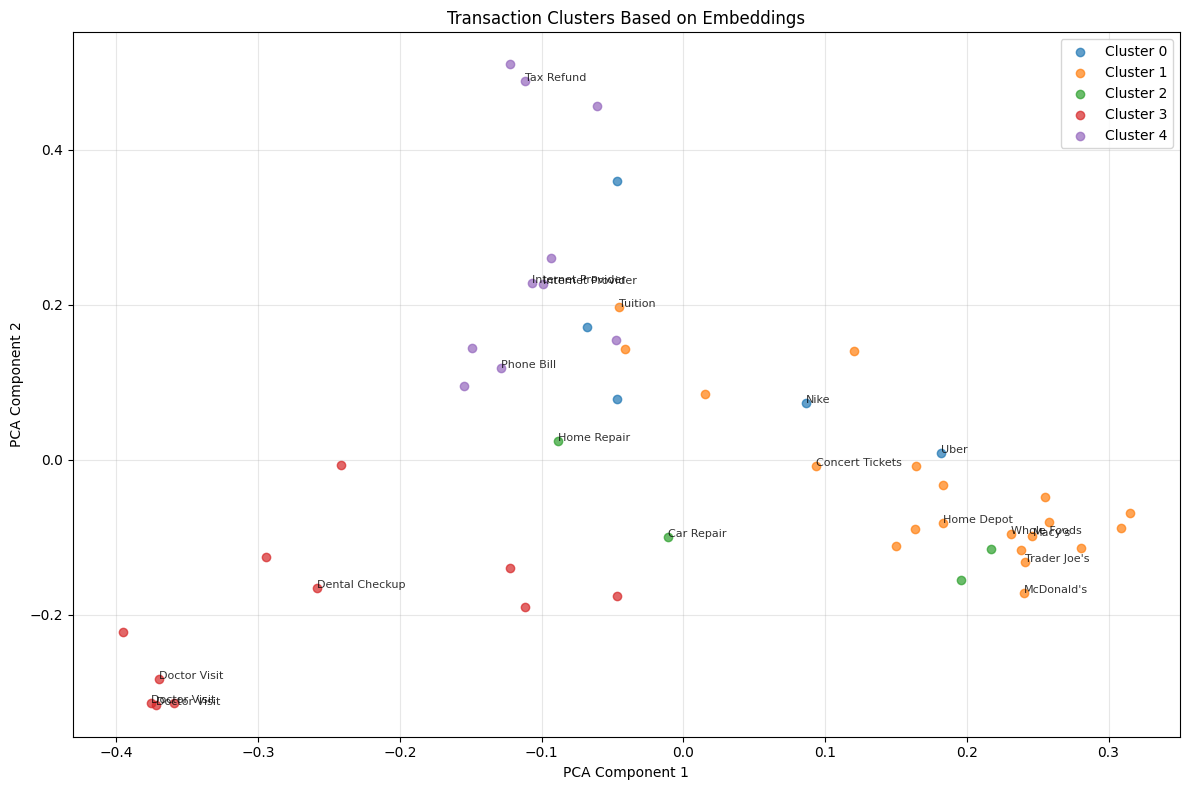

In [19]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Convert embeddings to numpy array
embedding_array = np.array(subset_df['Embedding'].tolist())

# Apply K-means clustering
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
subset_df['Cluster'] = kmeans.fit_predict(embedding_array)

# Apply PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embedding_array)
subset_df['PCA1'] = pca_result[:, 0]
subset_df['PCA2'] = pca_result[:, 1]

# Plot clusters
plt.figure(figsize=(12, 8))
for cluster in range(n_clusters):
    cluster_data = subset_df[subset_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}', alpha=0.7)

    # Add some transaction descriptions as annotations
    for i, (_, row) in enumerate(cluster_data.iterrows()):
        if i % 3 == 0:  # Annotate every 3rd point to avoid clutter
            plt.annotate(row['Description'],
                         (row['PCA1'], row['PCA2']),
                         fontsize=8,
                         alpha=0.8)

plt.title('Transaction Clusters Based on Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Let's analyze each cluster to understand the spending patterns.

In [20]:
# Analyze clusters
for cluster in range(n_clusters):
    cluster_data = subset_df[subset_df['Cluster'] == cluster]

    print(f"\nCluster {cluster} Analysis:")
    print(f"Number of transactions: {len(cluster_data)}")

    # Category distribution
    category_counts = cluster_data['Category'].value_counts()
    print(f"Top categories: {', '.join(category_counts.index[:3])}")

    # Average amount
    avg_amount = cluster_data['Amount'].mean()
    print(f"Average amount: ${avg_amount:.2f}")

    # Sample transactions
    print("Sample transactions:")
    for _, row in cluster_data.head(3).iterrows():
        print(f"  - {row['Description']} (${abs(row['Amount']):.2f}, {row['Category']})")

    # Generate a cluster description using Gemini
    cluster_text = "\n".join([f"{row['Description']} - ${abs(row['Amount']):.2f} - {row['Category']}"
                             for _, row in cluster_data.iterrows()])

    prompt = f"""
    Analyze these transactions and provide a brief 1-2 sentence description of this spending cluster:
    {cluster_text}
    """

    client = get_gemini_client()

    response = client.models.generate_content(
      model=TEXT_MODEL,
      contents=prompt
    )

    print(response.text)


    

    print(f"\nCluster description: {response.text}")
    print("-" * 80)


Cluster 0 Analysis:
Number of transactions: 5
Top categories: Transportation, Healthcare, Income
Average amount: $473.62
Sample transactions:
  - Uber ($42.72, Transportation)
  - Gym Membership ($427.87, Healthcare)
  - Gift ($4162.96, Income)
This spending cluster indicates a high-income individual with significant expenses in housing, fitness, and discretionary spending. The large gift received likely contributes to the ability to afford these expenditures.


Cluster description: This spending cluster indicates a high-income individual with significant expenses in housing, fitness, and discretionary spending. The large gift received likely contributes to the ability to afford these expenditures.

--------------------------------------------------------------------------------

Cluster 1 Analysis:
Number of transactions: 20
Top categories: Groceries, Shopping, Dining
Average amount: $-189.79
Sample transactions:
  - Whole Foods ($162.33, Groceries)
  - Target ($108.10, Groceries)
  

## 4. Capability 3: RAG for Financial Knowledge

Let's implement a Retrieval Augmented Generation (RAG) system to provide evidence-based financial advice.

In [21]:
# Create a knowledge base of financial advice
financial_knowledge = [
    "The 50/30/20 rule suggests allocating 50% of your income to needs, 30% to wants, and 20% to savings and debt repayment.",
    "An emergency fund should ideally cover 3-6 months of essential expenses.",
    "High-interest debt, such as credit card debt, should be prioritized for repayment before investing.",
    "Dollar-cost averaging is an investment strategy where you invest a fixed amount regularly, regardless of market conditions.",
    "A good credit score (above 700) can help you qualify for better interest rates on loans and credit cards.",
    "Diversification in investments helps reduce risk by spreading your money across different asset classes.",
    "Tax-advantaged accounts like 401(k)s and IRAs can help you save for retirement while reducing your tax burden.",
    "Compound interest is the addition of interest to the principal sum of a loan or deposit, resulting in interest earned on interest.",
    "Inflation erodes the purchasing power of money over time, which is why investing is important for long-term financial goals.",
    "A budget is a financial plan that helps you track income and expenses, ensuring you live within your means.",
    "Automating savings and bill payments can help ensure financial consistency and avoid late fees.",
    "The rule of 72 is a simple way to determine how long it will take for an investment to double: divide 72 by the annual rate of return.",
    "Paying yourself first means automatically setting aside a portion of your income for savings before spending on other expenses.",
    "A debt-to-income ratio below 36% is generally considered good for financial health.",
    "Lifestyle inflation occurs when spending increases with income, preventing wealth accumulation despite higher earnings.",
    "Renting can be financially advantageous in certain situations, such as when housing prices are high or when you need flexibility.",
    "Term life insurance is generally more cost-effective than whole life insurance for most people's needs.",
    "A health savings account (HSA) offers triple tax advantages: tax-deductible contributions, tax-free growth, and tax-free withdrawals for qualified medical expenses.",
    "The 4% rule suggests that retirees can withdraw 4% of their retirement savings in the first year, then adjust for inflation each year, with a high probability of not running out of money for at least 30 years.",
    "Zero-based budgeting means allocating every dollar of income to a specific purpose, whether spending, saving, or investing."
]

In [22]:
import chromadb
from chromadb.api import EmbeddingFunction
from typing import List

# Disable telemetry (important)
import os
os.environ["CHROMA_TELEMETRY"] = "FALSE"

chroma_client = chromadb.Client()

class GenaiEmbeddingFunction(EmbeddingFunction):
    def __call__(self, texts: List[str]) -> List[List[float]]:
        embeddings = []
        for text in texts:
            emb = get_embedding(text)
            if emb is None:
                raise ValueError("Embedding generation failed for text")
            embeddings.append(emb)
        return embeddings

# Reset collection safely
try:
    chroma_client.delete_collection(name="financial_knowledge")
    print("Deleted existing collection")
except Exception:
    print("No existing collection to delete")

financial_collection = chroma_client.create_collection(
    name="financial_knowledge",
    embedding_function=GenaiEmbeddingFunction()
)

print("Created new collection")

financial_collection.add(
    documents=financial_knowledge,
    ids=[f"doc_{i}" for i in range(len(financial_knowledge))]
)

print(f"Added {len(financial_knowledge)} documents to collection")


Failed to send telemetry event ClientStartEvent: capture() takes 1 positional argument but 3 were given
Failed to send telemetry event ClientCreateCollectionEvent: capture() takes 1 positional argument but 3 were given


No existing collection to delete
Created new collection


Failed to send telemetry event CollectionAddEvent: capture() takes 1 positional argument but 3 were given


Added 20 documents to collection


In [23]:
def get_financial_advice_with_rag(question: str):
    """
    Uses ChromaDB for retrieval + Gemini for generation
    """
    # Retrieve relevant documents
    results = financial_collection.query(
        query_texts=[question],
        n_results=3
    )

    relevant_docs = results["documents"][0]

    # Build context
    context = "\n\n".join(relevant_docs)

    prompt = f"""
You are a financial advisor providing evidence-based advice.
Use the following financial knowledge to answer the question.

Financial Knowledge:
{context}

Question:
{question}

Provide a helpful, informative response that directly addresses the question.
Include specific advice from the knowledge base and explain why it's relevant.
Format your response in markdown.
"""

    # ✅ Correct Gemini call (NO model variable)
    client = get_gemini_client()
    response = client.models.generate_content(
        model=TEXT_MODEL,
        contents=prompt
    )

    return {
        "response": response.text,
        "sources": relevant_docs
    }


In [24]:
# Test the RAG system with some financial questions
financial_questions = [
    "How should I allocate my monthly income?",
    "What's the best way to save for emergencies?",
    "Should I pay off debt or invest first?"
]

for question in financial_questions:
    print(f"Question: {question}\n")

    result = get_financial_advice_with_rag(question)

    print("Response:")
    display(Markdown(result['response']))

    print("\nSources:")
    for i, source in enumerate(result['sources'], 1):
        print(f"{i}. {source}")

    print("\n" + "-"*80 + "\n")

Question: How should I allocate my monthly income?



Failed to send telemetry event CollectionQueryEvent: capture() takes 1 positional argument but 3 were given


Response:


Okay, let's break down how you should allocate your monthly income, leveraging proven financial strategies.

**Following the 50/30/20 Rule as a Guideline:**

The 50/30/20 rule is a great starting point. It suggests allocating your after-tax monthly income as follows:

*   **50% to Needs:** These are essential expenses like housing (rent or mortgage payments), utilities, groceries, transportation (car payments, gas, public transit), insurance (health, car, home/renters), and minimum debt payments.
*   **30% to Wants:** These are non-essential expenses that you enjoy but could technically live without. Examples include dining out, entertainment, hobbies, travel, subscriptions, and non-essential clothing.
*   **20% to Savings & Debt Repayment:** This portion is crucial for your financial future. It includes savings goals (emergency fund, retirement, down payment on a house), and aggressively paying down debt, *especially* high-interest debt.

**Prioritizing Savings and Debt Repayment: "Paying Yourself First" and Addressing High-Interest Debt**

While the 50/30/20 rule is a useful guideline, you should adjust the proportions based on your specific circumstances, particularly regarding debt. Here's how to prioritize:

1.  **"Pay Yourself First":**  Before you even *think* about your needs and wants, automate savings.  This might mean setting up an automatic transfer from your checking account to a savings account on the day you get paid.  The amount should ideally be at least enough to match any employer retirement plan contributions and to slowly build up an emergency fund of at least 3-6 months of essential living expenses.  This addresses the principle of *paying yourself first*.
2.  **Attack High-Interest Debt:**  After automating your basic savings, focus on debt. If you have credit card debt or other high-interest debt, you should aggressively pay it down. *This is more important than investing*. Credit card interest rates can easily exceed 15% or even 20%. Paying off this debt provides a guaranteed return equal to the interest rate you are avoiding. So if you have credit card debt at 20%, then paying that off is like getting a guaranteed 20% return on your money which is far better than you are likely to get from most other types of investment, particularly when you consider that the investment return is taxable.

3.  **Allocate Remaining Funds:** After automated savings and after maximizing paying down your high interest debt, assess what is left and adjust percentages accordingly.

**Why This Approach Works:**

*   **Provides a Framework:** The 50/30/20 rule gives you a structure to start with, making budgeting less daunting.
*   **Prioritizes Financial Security:** "Paying yourself first" and aggressively addressing high-interest debt set you up for long-term financial success.  Debt is a major wealth killer, and savings provide a safety net and allow you to pursue your financial goals.
*   **Flexibility:** The percentages are not set in stone. Adjust them based on your individual needs, goals, and debt levels. For example, if you live in a high cost of living area, you might need to allocate more than 50% to needs and reduce the amount allocated to wants or even savings if high interest debt is minimal or non-existent.
*   **Promotes Awareness:** Regularly tracking your income and expenses helps you understand where your money is going and identify areas where you can make adjustments.

**Actionable Steps:**

1.  **Calculate Your After-Tax Monthly Income:** This is the base from which you'll calculate your allocations.
2.  **Track Your Spending:**  For a month, track where your money goes to understand your current spending habits.
3.  **Categorize Your Expenses:** Determine which expenses fall into needs, wants, savings, and debt repayment.
4.  **Adjust and Automate:**  Adjust your spending to align with the 50/30/20 rule (or your modified version of it). Automate your savings and debt payments to ensure consistency.

By combining the 50/30/20 rule with the principle of "paying yourself first" and prioritizing high-interest debt repayment, you can create a budget that helps you achieve your financial goals and build a secure financial future. Remember, this is a starting point; adjust it based on your unique circumstances and financial priorities. Good luck!



Sources:
1. The 50/30/20 rule suggests allocating 50% of your income to needs, 30% to wants, and 20% to savings and debt repayment.
2. Paying yourself first means automatically setting aside a portion of your income for savings before spending on other expenses.
3. High-interest debt, such as credit card debt, should be prioritized for repayment before investing.

--------------------------------------------------------------------------------

Question: What's the best way to save for emergencies?

Response:


Okay, here's the best way to save for emergencies, based on sound financial principles:

The most effective way to save for emergencies is a multi-pronged approach focusing on automation and consistency.

1.  **Determine Your Emergency Fund Target:** The first step is to calculate your monthly essential expenses (rent/mortgage, utilities, groceries, transportation, healthcare, etc.). Then, aim to save 3-6 months' worth of these expenses. This is the "emergency fund" goal. The *reasoning behind this is that having 3-6 months' worth of expenses covered allows you a financial buffer to cover unforeseen circumstances such as job loss or unexpected medical bills*.

2.  **Automate Your Savings:** Set up an automatic transfer from your checking account to a dedicated high-yield savings account specifically earmarked for emergencies. *This directly addresses the principle of "automating savings"*. Even a small amount each paycheck, consistently saved, adds up significantly over time.

3. **Pay Yourself First:** Before paying bills or considering discretionary spending, ensure that your emergency savings contribution is deducted from your income first. *This relates to "paying yourself first," a cornerstone of sound personal finance. By prioritizing your savings, you guarantee that it happens, rather than relying on leftover funds which often disappear*.

For example, If your monthly essential expenses are $2,000, your target emergency fund is $6,000-$12,000. Let's say you decide to save $200 per paycheck, twice a month. That adds up to $400/month, and you'll reach the $6,000 goal in 15 months. Increase the savings rate for faster results.

**In summary, Calculate your goal, automate your savings, and pay yourself first to ensure you are steadily working toward your emergency savings target**.



Sources:
1. An emergency fund should ideally cover 3-6 months of essential expenses.
2. Automating savings and bill payments can help ensure financial consistency and avoid late fees.
3. Paying yourself first means automatically setting aside a portion of your income for savings before spending on other expenses.

--------------------------------------------------------------------------------

Question: Should I pay off debt or invest first?

Response:


Okay, let's tackle the "debt vs. invest" question.  Generally, the most financially sound advice is to **prioritize paying off high-interest debt before aggressively investing.**

Here's why, based on the financial principles we've established:

*   **High-Interest Debt is a Drag:** Credit card debt, for example, often carries extremely high interest rates (sometimes exceeding 20%). This means that a significant portion of your payments goes towards interest, not actually reducing the principal amount you owe.  You're essentially losing money just to keep the debt active. By aggressively paying down this type of debt, you free up cash flow that would otherwise be consumed by interest payments. This aligns with the principle that **High-interest debt, such as credit card debt, should be prioritized for repayment before investing.**

*   **Debt-to-Income Ratio Matters:**  A healthy financial life includes managing your debt effectively. As mentioned, a debt-to-income (DTI) ratio below 36% is generally considered good. Paying down debt directly lowers your DTI, improving your financial health and opening up more opportunities (like qualifying for a mortgage or other loans at better rates). Investing while carrying high debt can make it harder to improve your DTI and could negatively impact your overall financial stability.

**Here's a practical approach:**

1.  **Assess Your Debt:** List all your debts, including the interest rate for each. Identify any high-interest debts (anything above, say, 8% or 10% is usually considered high).
2.  **Prioritize High-Interest Debt:** Focus your efforts on paying down the debt with the highest interest rate first. You can use the "debt avalanche" (highest interest first) or the "debt snowball" (smallest balance first) method, but the avalanche method is mathematically the most efficient.
3.  **Build an Emergency Fund:** Before aggressively paying off debt, make sure you have a small emergency fund (e.g., $1,000). This will prevent you from having to rely on credit cards in case of unexpected expenses.
4.  **Pay Yourself First (Even a Little):** While focusing on debt repayment, consider setting aside a small percentage of your income for savings and investments. This is where the "pay yourself first" concept comes in. Even a small amount, consistently saved, can build a good habit and get you used to the feeling of investing for your future. After you've conquered the high-interest debt, you can reallocate those payments to ramp up your investing contributions.
5.  **Once High-Interest Debt is Gone:** Once your high-interest debt is paid off, and your DTI is in a healthy range, shift your focus to investing. You can then allocate a larger portion of your income to retirement accounts, brokerage accounts, or other investments that align with your financial goals.

**In summary:** Paying off high-interest debt is often the smartest first step because it provides an immediate and guaranteed return by eliminating interest payments. After that, you can aggressively pursue your investment goals.



Sources:
1. High-interest debt, such as credit card debt, should be prioritized for repayment before investing.
2. A debt-to-income ratio below 36% is generally considered good for financial health.
3. Paying yourself first means automatically setting aside a portion of your income for savings before spending on other expenses.

--------------------------------------------------------------------------------



## 5. Capability 4: Function Calling for Financial Calculations

Let's implement function calling to perform financial calculations based on user queries.

In [25]:
# Define financial calculation functions
def calculate_budget_allocation(monthly_income):
    """Calculate budget allocation based on the 50/30/20 rule."""
    needs = monthly_income * 0.5
    wants = monthly_income * 0.3
    savings = monthly_income * 0.2
    return {
        "needs": needs,
        "wants": wants,
        "savings": savings
    }

def calculate_emergency_fund(monthly_expenses, months=6):
    """Calculate recommended emergency fund amount."""
    return monthly_expenses * months

def calculate_debt_payoff(principal, annual_interest_rate, monthly_payment):
    """Calculate time to pay off debt and total interest paid."""
    monthly_rate = annual_interest_rate / 12 / 100
    num_payments = 0
    total_interest = 0
    remaining_balance = principal

    while remaining_balance > 0:
        interest = remaining_balance * monthly_rate
        principal_payment = min(monthly_payment - interest, remaining_balance)

        if monthly_payment <= interest:
            return {
                "months": float('inf'),
                "years": float('inf'),
                "total_interest": float('inf'),
                "error": "Monthly payment too low to cover interest"
            }

        remaining_balance -= principal_payment
        total_interest += interest
        num_payments += 1

        if num_payments > 1200:  # 100 years cap
            break

    return {
        "months": num_payments,
        "years": num_payments / 12,
        "total_interest": total_interest
    }

def calculate_investment_growth(principal, annual_return, years, monthly_contribution=0):
    """Calculate investment growth over time."""
    monthly_rate = annual_return / 12 / 100
    num_months = years * 12
    value = principal

    for _ in range(int(num_months)):
        value = value * (1 + monthly_rate) + monthly_contribution

    return {
        "final_value": value,
        "initial_investment": principal,
        "total_contributions": monthly_contribution * num_months,
        "interest_earned": value - principal - (monthly_contribution * num_months)
    }

def calculate_loan_payment(principal, annual_interest_rate, years):
    """Calculate monthly payment for a loan."""
    monthly_rate = annual_interest_rate / 12 / 100
    num_payments = years * 12

    if monthly_rate == 0:
        monthly_payment = principal / num_payments
    else:
        monthly_payment = principal * (monthly_rate * (1 + monthly_rate) ** num_payments) / ((1 + monthly_rate) ** num_payments - 1)

    total_cost = monthly_payment * num_payments
    total_interest = total_cost - principal

    return {
        "monthly_payment": monthly_payment,
        "total_cost": total_cost,
        "total_interest": total_interest
    }

In [26]:
def financial_calculator(query: str):
    """
    Determines which financial calculation to perform based on the query,
    extracts parameters, executes the calculation, and returns the result.
    """

    function_descriptions = """
Available financial calculation functions:

1. budget_allocation
   - Parameters: income (float)
   - Returns: {"needs": float, "wants": float, "savings": float}

2. emergency_fund
   - Parameters: monthly_expenses (float)
   - Returns: {"recommended_fund": float}

3. debt_payoff
   - Parameters: principal (float), annual_interest_rate (float), monthly_payment (float)
   - Returns: {"months_to_payoff": int, "total_interest": float}

4. investment_growth
   - Parameters: principal (float), annual_return_rate (float), years (int)
   - Returns: {"future_value": float}

5. mortgage_payment
   - Parameters: loan_amount (float), annual_interest_rate (float), years (int)
   - Returns: {"monthly_payment": float, "total_cost": float, "total_interest": float}
"""

    prompt = f"""
You are a financial calculator assistant.
Based on the user's query, determine which financial function to call
and extract the necessary parameters.

User query:
{query}

{function_descriptions}

Return ONLY a valid JSON object with:
- function_name
- parameters
- explanation

Only include numeric values for parameters.
"""

    # ✅ CORRECT Gemini call (no `model`)
    client = get_gemini_client()
    response = client.models.generate_content(
        model=TEXT_MODEL,
        contents=prompt
    )

    try:
        response_text = response.text.strip()
        parsed = json.loads(response_text)

        function_name = parsed["function_name"]
        parameters = parsed["parameters"]
        explanation = parsed["explanation"]

        # Execute the selected function
        if function_name == "budget_allocation":
            result = budget_allocation(**parameters)
        elif function_name == "emergency_fund":
            result = emergency_fund(**parameters)
        elif function_name == "debt_payoff":
            result = debt_payoff(**parameters)
        elif function_name == "investment_growth":
            result = investment_growth(**parameters)
        elif function_name == "mortgage_payment":
            result = mortgage_payment(**parameters)
        else:
            return {"error": "Unknown function selected"}

        return {
            "function_name": function_name,
            "parameters": parameters,
            "explanation": explanation,
            "result": result
        }

    except Exception as e:
        return {
            "error": "Failed to parse or execute financial calculation",
            "response": response.text,
            "exception": str(e)
        }


In [27]:

# Test the financial calculator with some queries
financial_queries = [
    "How should I budget my $5000 monthly income?",
    "How much emergency fund do I need if my monthly expenses are $3000?",
    "How long will it take to pay off $10000 credit card debt with 18% interest if I pay $500 monthly?",
    "If I invest $10000 with 8% annual return for 20 years, how much will I have?",
    "What would be my monthly payment for a $300000 mortgage at 4.5% interest for 30 years?"
]

for query in financial_queries:
    print(f"Query: {query}\n")

    result = financial_calculator(query)

    if 'error' in result and 'function_call' not in result:
        print(f"Error: {result['error']}")
        if 'response' in result:
            print(f"Response: {result['response']}")
    else:
        print(f"Function: {result['function_name']}")
        print(f"Parameters: {result['parameters']}")
        print(f"Explanation: {result['explanation']}")
        print("\nResult:")

        # Fix: Check the type of result['result'] before trying to iterate
        if isinstance(result['result'], dict):
            # If result is a dictionary, iterate through its items
            for key, value in result['result'].items():
                if isinstance(value, float):
                    print(f"  {key}: ${value:.2f}")
                else:
                    print(f"  {key}: {value}")
        elif isinstance(result['result'], (int, float)):
            # If result is a number, print it directly
            print(f"  ${result['result']:.2f}")
        else:
            # If result is any other type (like string), print it as is
            print(f"  {result['result']}")

    print("\n" + "-"*80 + "\n")


Query: How should I budget my $5000 monthly income?

Error: Failed to parse or execute financial calculation
Response: ```json
{
  "function_name": "budget_allocation",
  "parameters": {
    "income": 5000.0
  },
  "explanation": "The user wants to know how to budget their monthly income. The budget_allocation function is the best fit for this query."
}
```

--------------------------------------------------------------------------------

Query: How much emergency fund do I need if my monthly expenses are $3000?

Error: Failed to parse or execute financial calculation
Response: ```json
{
  "function_name": "emergency_fund",
  "parameters": {
    "monthly_expenses": 3000.0
  },
  "explanation": "The user is asking how much emergency fund they need, and they provided their monthly expenses. The emergency_fund function takes monthly expenses as a parameter to calculate the recommended emergency fund."
}
```

--------------------------------------------------------------------------------


## Conclusion

In this project, I've built FinGenius, an AI-powered personal finance advisor that demonstrates multiple Gen AI capabilities:

1. **Structured Output/JSON Mode**: I used structured output to categorize financial transactions and extract financial information in a consistent format.

2. **Embeddings**: I leveraged embeddings to find similar transactions and cluster spending patterns, providing insights into financial behavior.

3. **RAG (Retrieval Augmented Generation)**: I implemented a knowledge base of financial advice and used RAG to provide evidence-based financial recommendations.

4. **Function Calling**: I created financial calculation functions and used function calling to perform calculations based on user queries.


### Real-World Applications

This project has numerous real-world applications:

- **Personal Finance Management**: Helping individuals understand their spending patterns and make better financial decisions.
- **Financial Education**: Providing accessible financial knowledge and advice to those without access to professional advisors.
- **Banking and Fintech**: Enhancing customer experience with AI-powered financial guidance.
- **Financial Inclusion**: Making financial advice accessible to underserved populations.

### Limitations and Future Improvements

While FinGenius demonstrates powerful capabilities, it has several limitations:

1. **Data Privacy and Security**: A production version would need robust security measures for handling sensitive financial data.
2. **Regulatory Compliance**: Financial advice is regulated in many jurisdictions, requiring careful implementation.
3. **Model Limitations**: The underlying models may not always provide accurate financial advice or calculations.
4. **Limited Financial Knowledge**: The knowledge base is small and would need expansion for comprehensive coverage.

Future improvements could include:

- Integration with real financial data sources (banks, credit cards, investment accounts)
- More sophisticated financial planning algorithms
- Expanded knowledge base covering more financial topics
- Fine-tuning models specifically for financial advice
- Adding visualization capabilities for financial projections
- Implementing user authentication and data encryption

### Final Thoughts

FinGenius demonstrates how Gen AI capabilities can be combined to create a powerful, practical application that addresses a real-world need. By leveraging structured output, embeddings, RAG, function calling, and agent workflows, we've created a system that can help users understand their finances, set goals, and make better financial decisions.

As Gen AI technology continues to advance, applications like FinGenius will become increasingly sophisticated and valuable, potentially democratizing access to high-quality financial advice and improving financial outcomes for millions of people.

---
## 🔹 Part 2: Finance Optimization Tools (Extended)

# FinGenius – Modified Personal Finance Optimization Agent

This notebook extends the original FinGenius Gemini Agent to support:
- Expense Categorization
- Subscription Detection
- Personalized Budgeting
- Goal-Based Planning
- Investment Recommendations
- Accuracy Guardrails

No model training is required. This agent uses deterministic tools + LLM reasoning.

In [28]:

# Basic imports
from typing import List, Dict
from datetime import datetime


## Expense Categorization Tool

In [29]:

def categorize_transaction(description: str) -> str:
    rules = {
        "Food": ["zomato", "swiggy", "restaurant", "cafe", "food"],
        "Travel": ["uber", "ola", "metro", "bus", "flight"],
        "Subscriptions": ["netflix", "spotify", "prime", "hotstar"],
        "EMI": ["emi", "loan", "credit card"],
        "Utilities": ["electricity", "wifi", "gas", "water"],
        "Shopping": ["amazon", "flipkart", "mall"],
        "Health": ["hospital", "pharmacy", "medical"],
        "Education": ["course", "udemy", "coursera", "college"]
    }

    desc = description.lower()
    for category, keywords in rules.items():
        if any(k in desc for k in keywords):
            return category
    return "Other"


## Subscription Detection Tool

In [30]:

def detect_subscriptions(transactions: List[Dict]) -> List[Dict]:
    recurring = {}

    for tx in transactions:
        key = (tx["merchant"], tx["amount"])
        recurring.setdefault(key, []).append(tx["date"])

    subscriptions = []
    for (merchant, amount), dates in recurring.items():
        if len(dates) >= 3:
            subscriptions.append({
                "merchant": merchant,
                "amount": amount,
                "frequency": "Monthly (Detected)"
            })
    return subscriptions


## Personalized Budget Engine

In [31]:

def generate_budget(income: float, expenses: Dict[str, float]) -> Dict:
    budget = {
        "Essentials": round(income * 0.5, 2),
        "Savings": round(income * 0.2, 2),
        "Lifestyle": round(income * 0.3, 2)
    }

    overspending = {
        cat: amt for cat, amt in expenses.items()
        if amt > budget.get("Lifestyle", 0)
    }

    return {
        "recommended_budget": budget,
        "overspending_categories": overspending
    }


## Goal-Based Financial Planning

In [32]:

def goal_planning(goal_name: str, goal_amount: float, months: int) -> Dict:
    return {
        "goal": goal_name,
        "target_amount": goal_amount,
        "months": months,
        "monthly_saving_required": round(goal_amount / months, 2)
    }


## Investment Recommendation Engine

In [33]:

def investment_recommendation(risk_profile: str, monthly_savings: float) -> Dict:
    if risk_profile == "Low":
        options = ["Fixed Deposit", "Debt Mutual Fund"]
    elif risk_profile == "Medium":
        options = ["Index Fund SIP", "Hybrid Mutual Fund"]
    else:
        options = ["Equity Mutual Fund SIP", "ELSS (Long-term)"]

    return {
        "risk_profile": risk_profile,
        "suggested_investments": options,
        "recommended_monthly_investment": monthly_savings
    }


## Financial Accuracy Guardrail

In [34]:

def financial_guardrail(data: Dict) -> Dict:
    for k, v in data.items():
        if isinstance(v, (int, float)) and v < 0:
            raise ValueError("Invalid financial value detected")
    return data


## Tool Registry

In [35]:

TOOLS = {
    "categorize_transaction_v1": categorize_transaction,
    "detect_subscriptions_v1": detect_subscriptions,
    "generate_budget_v1": generate_budget,
    "goal_planning_v1": goal_planning,
    "investment_recommendation_v1": investment_recommendation,
    "financial_guardrail_v1": financial_guardrail
}


## Demo Example

In [36]:

sample_transactions = [
    {"merchant": "Zomato", "amount": 450, "date": "2025-01-10"},
    {"merchant": "Netflix", "amount": 499, "date": "2025-01-05"},
    {"merchant": "Netflix", "amount": 499, "date": "2024-12-05"},
    {"merchant": "Netflix", "amount": 499, "date": "2024-11-05"},
]

detect_subscriptions(sample_transactions)


[{'merchant': 'Netflix', 'amount': 499, 'frequency': 'Monthly (Detected)'}]

## ✅ Sanity Check

In [37]:

client = get_gemini_client()
response = client.models.generate_content(
    model=TEXT_MODEL,
    contents="Explain personal finance optimization in one simple line."
)
display(Markdown(response.text))


Make your money work harder for you by maximizing income, minimizing expenses, and strategically managing assets and debt.
